(2148, 28)
Iteration: 0


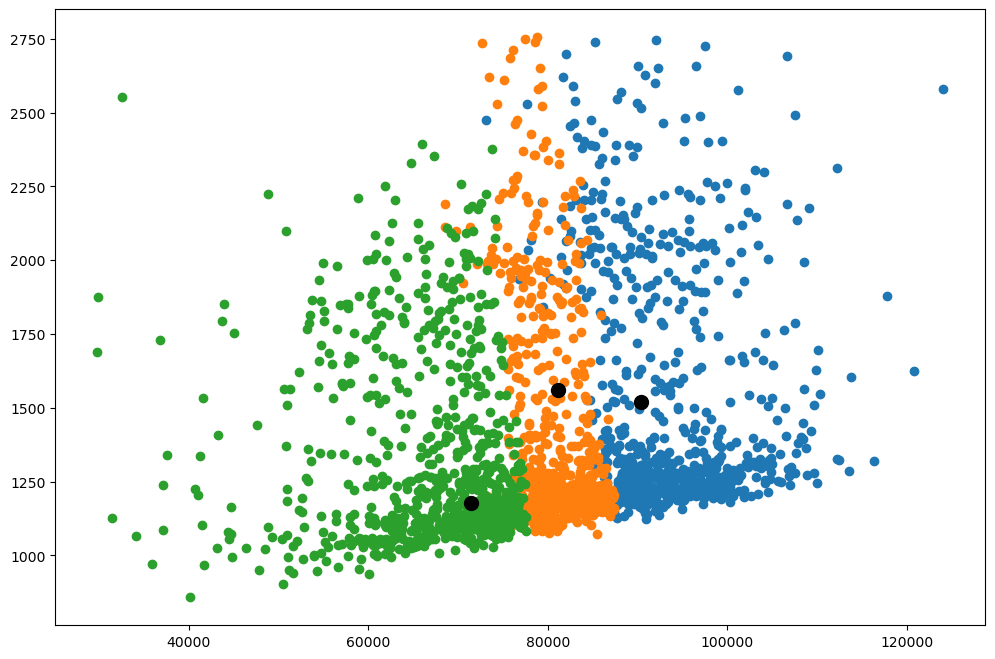

Iteration: 1


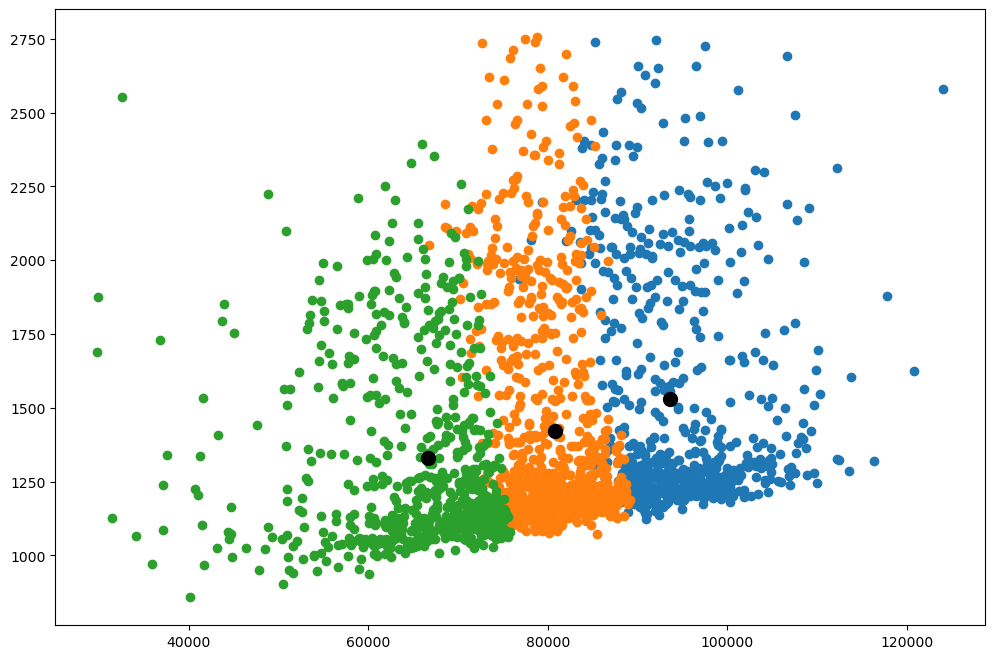

Iteration: 2


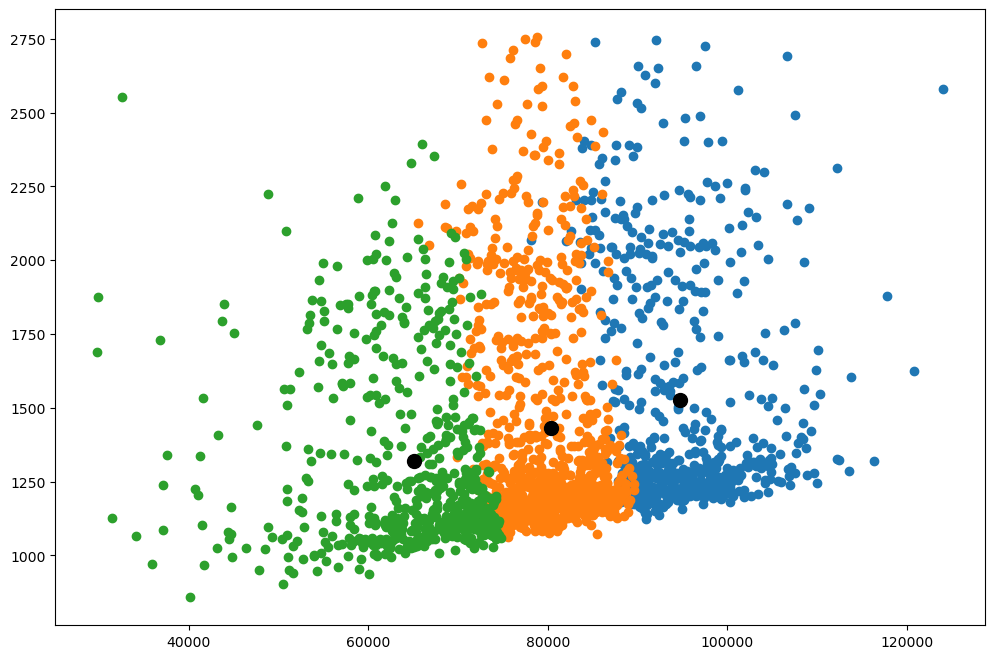

Iteration: 3


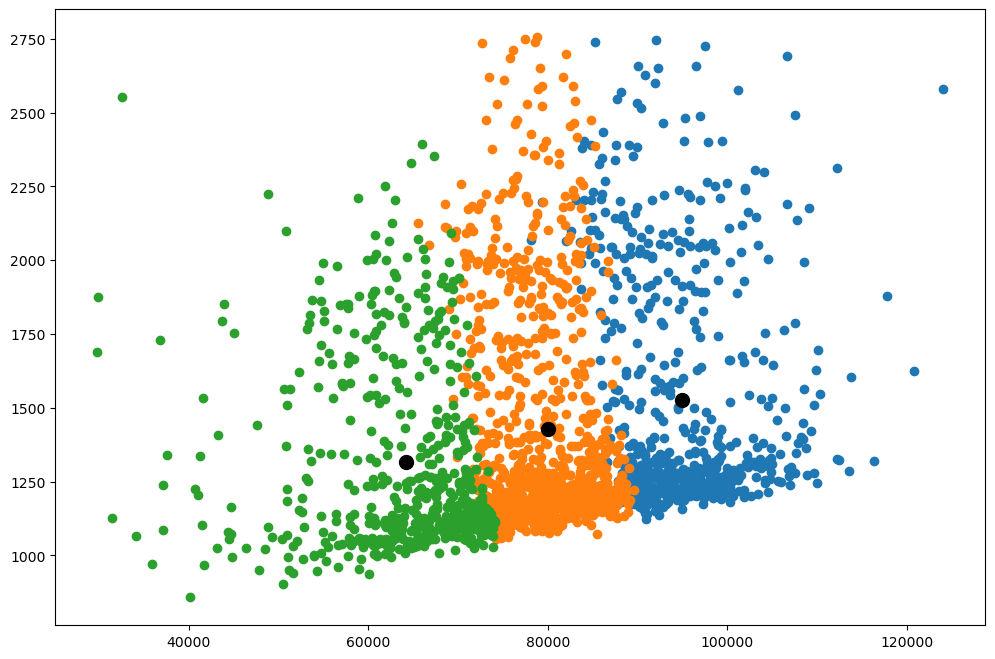

Iteration: 4


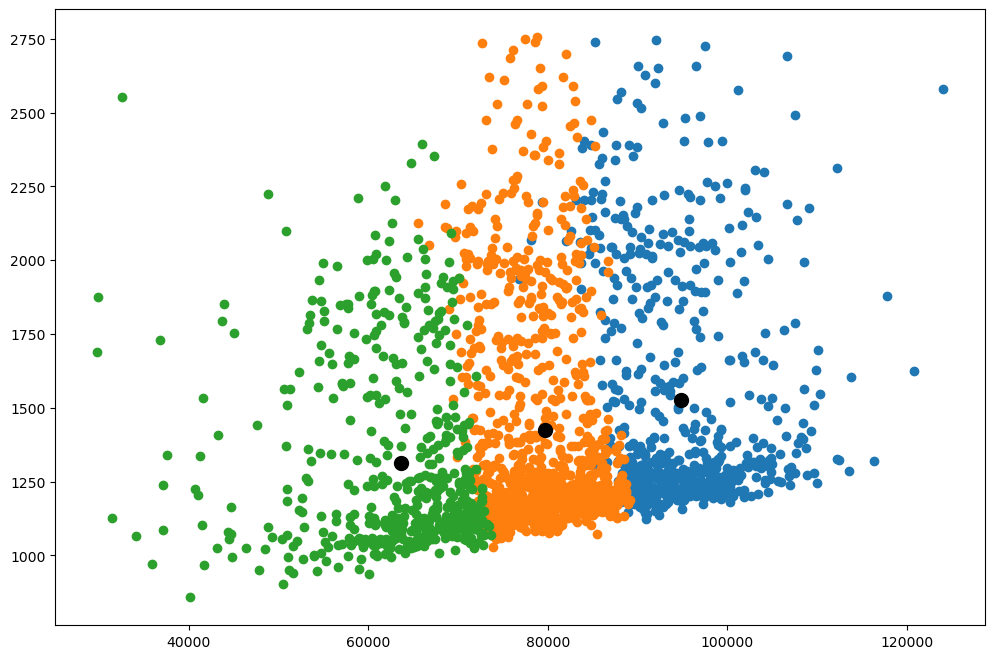

Iteration: 5


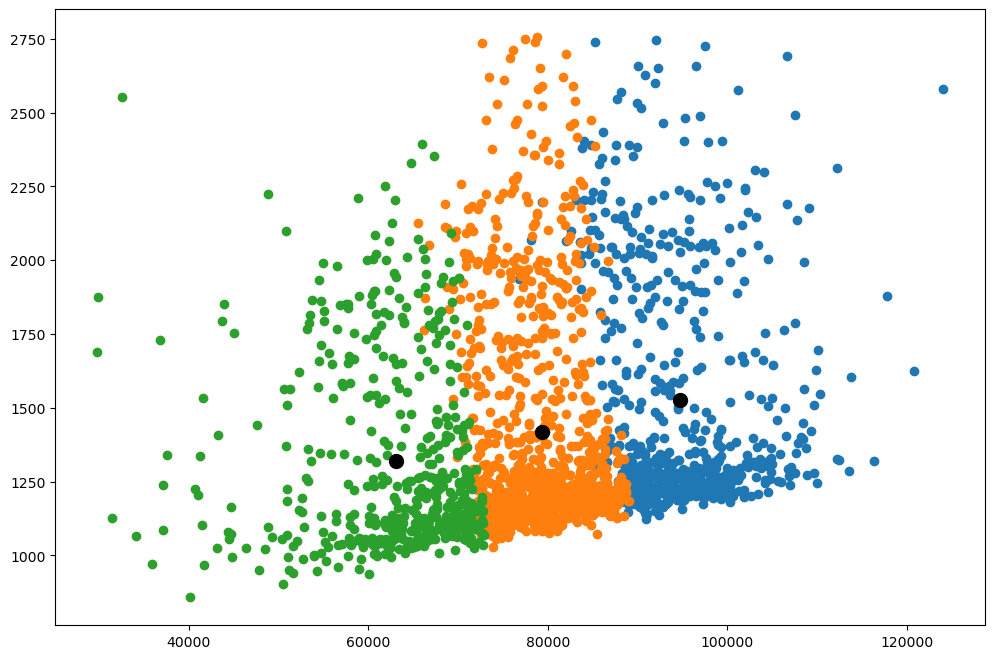

Iteration: 6


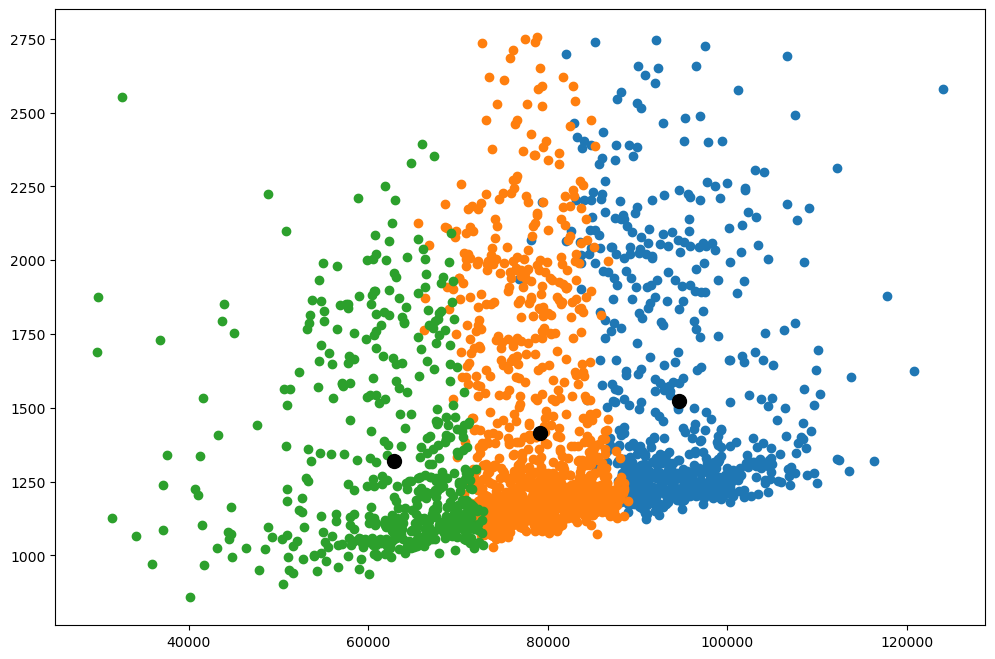

Iteration: 7


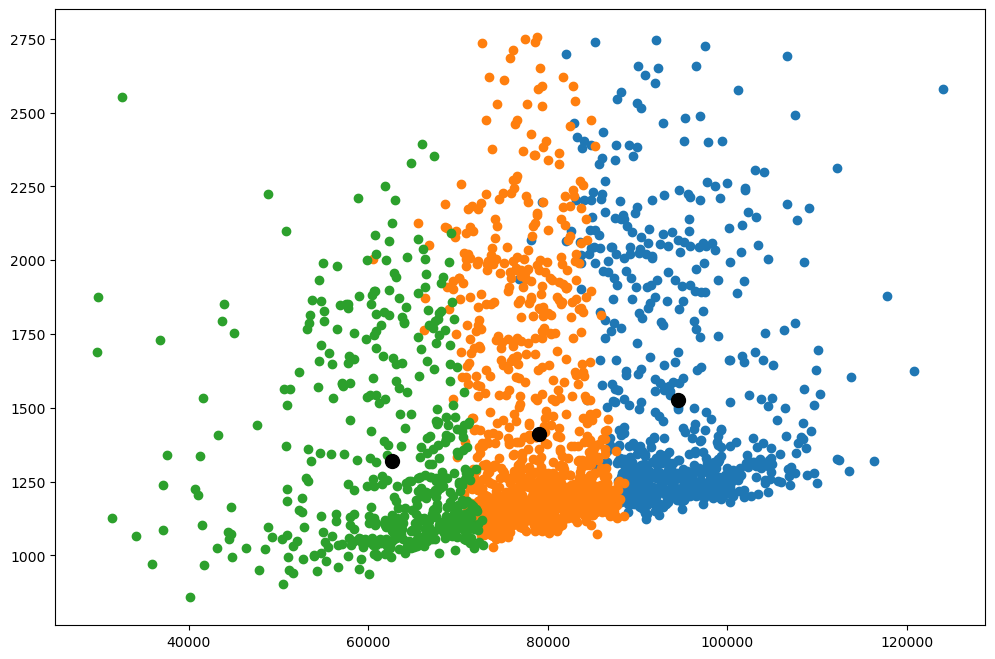

Iteration: 8


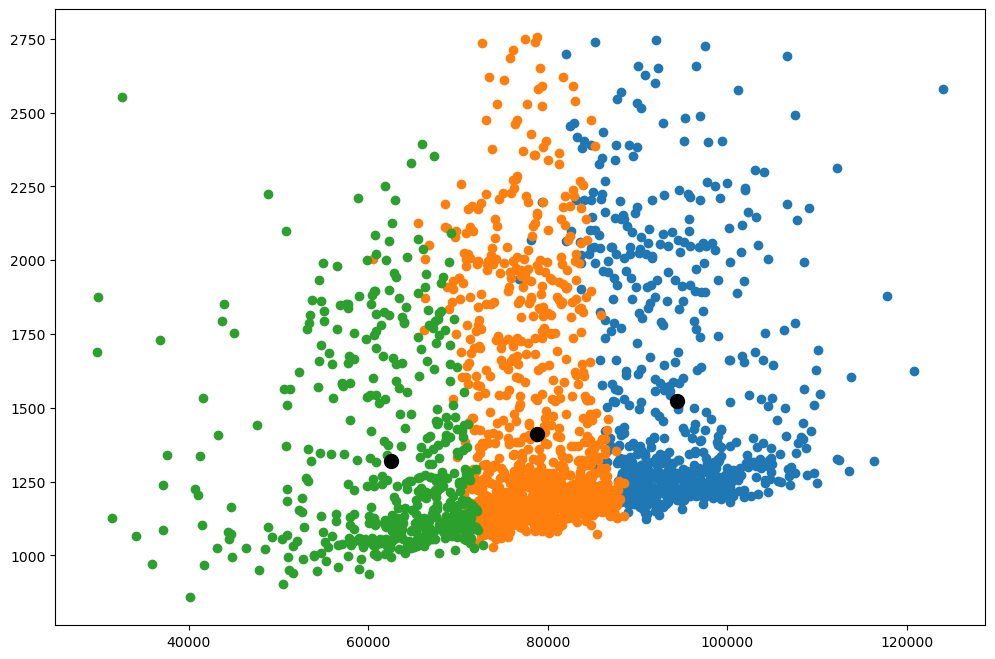

Iteration: 9


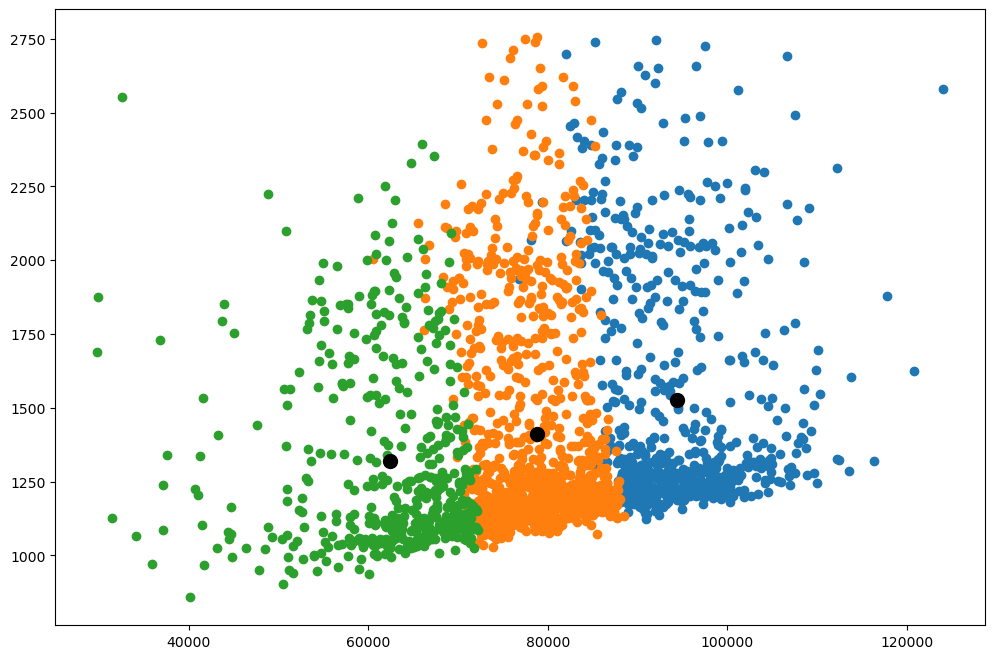

Iteration: 10


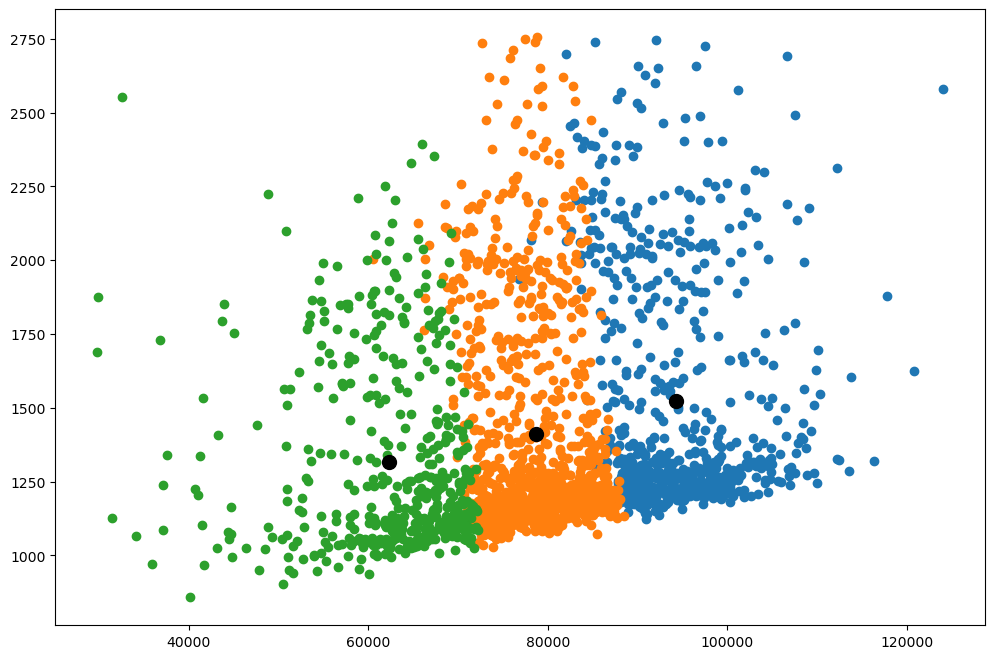

Iteration: 11


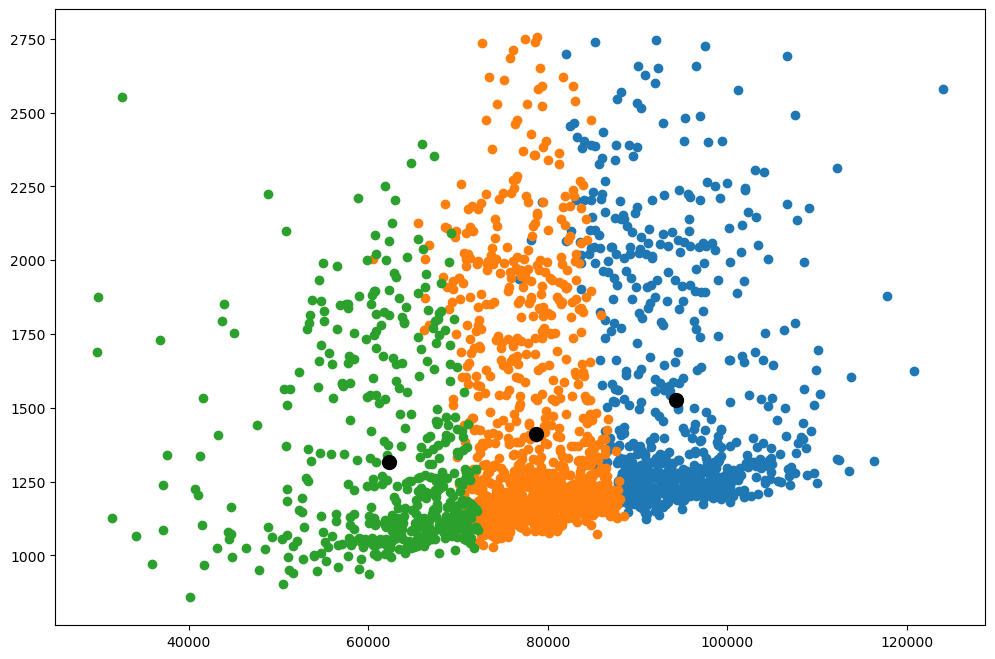

Iteration: 12


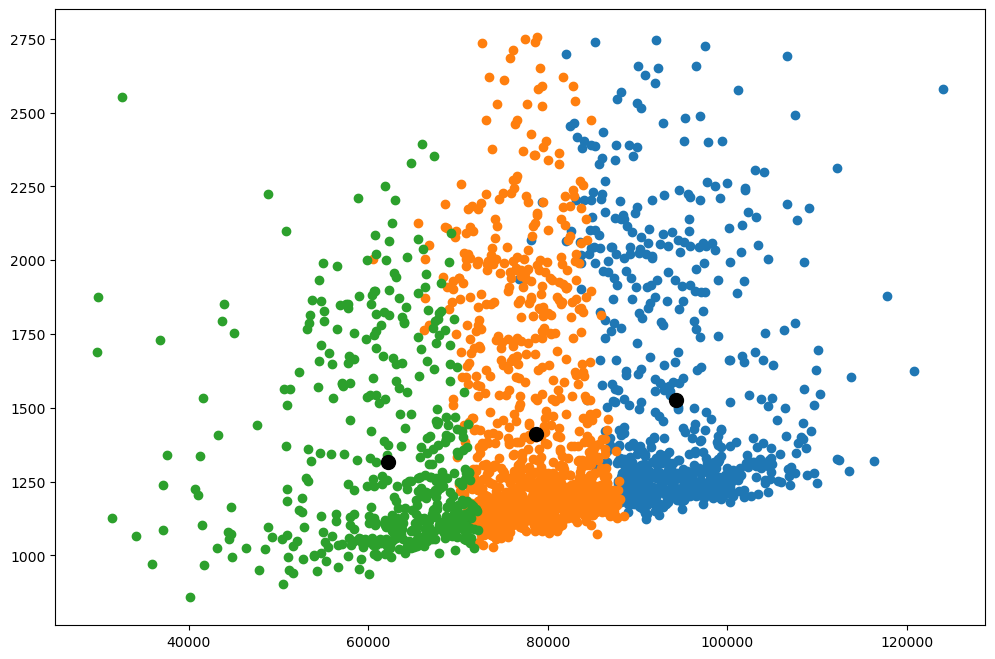

Iteration: 13


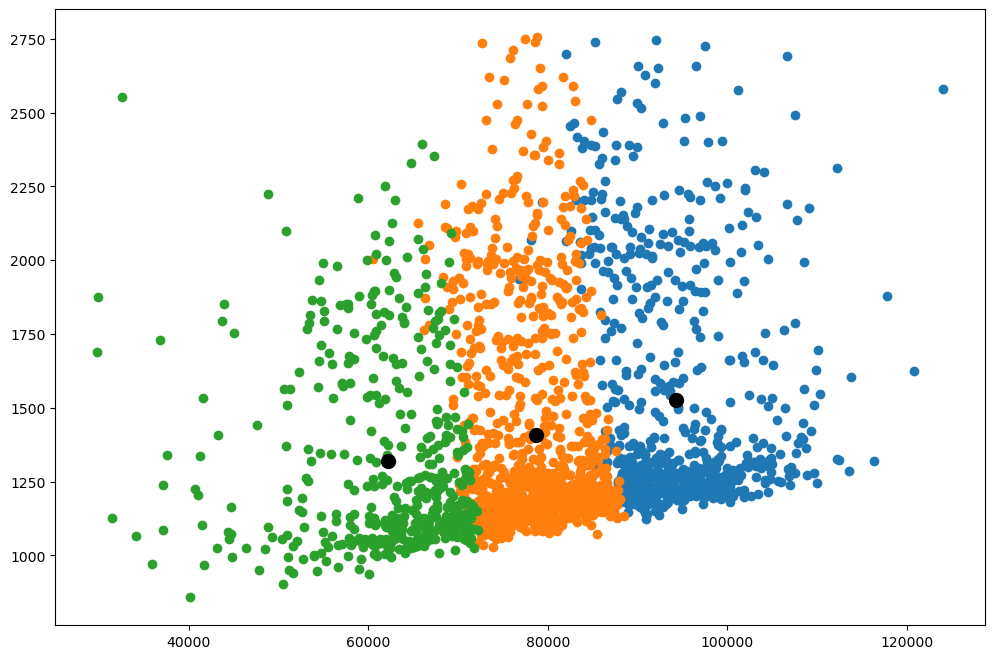

Iteration: 14


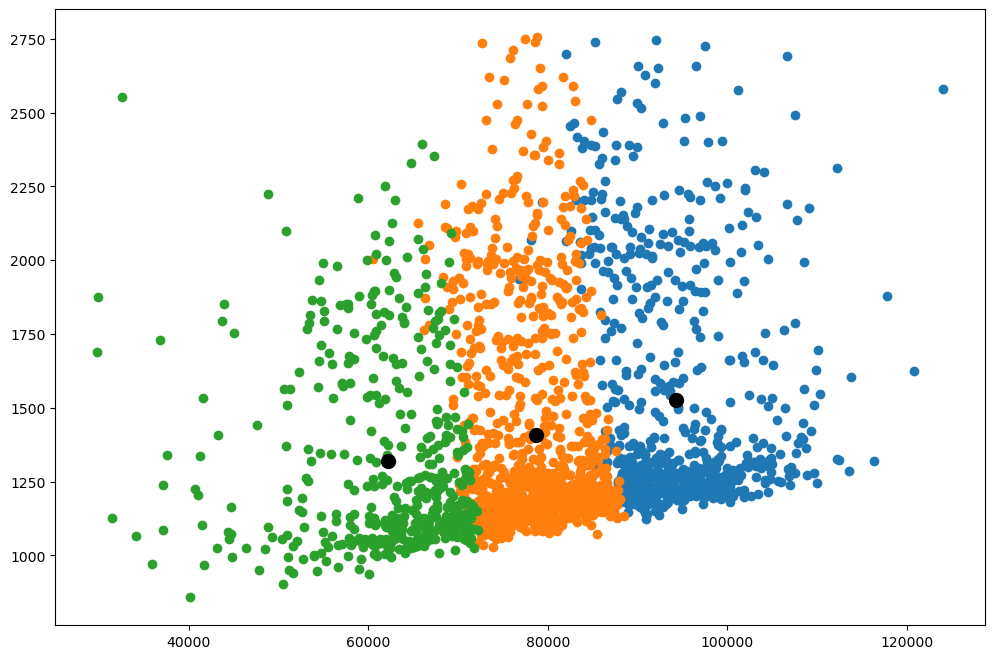

Final Centroids:
[[ 9.42916999e+04  1.52541402e+03  4.68113745e+02  2.67170579e+02
   8.14830758e-01  3.46289219e+02  9.50049629e-01  9.93541947e+04
   7.27432095e-01  1.76701902e+00  5.94759138e-01  7.41309064e-01
   4.98127786e-03  2.84011887e-03  5.51062853e-01  9.63261367e-01
   2.22221464e+02  2.12231034e+02  1.95882169e+02  2.11305930e+01
   2.24132129e+01  2.18496091e+01 -8.64445171e-01 -7.55765825e-01
  -4.53869985e-01  3.20805319e+00  2.99190862e+00  2.92947236e+00]
 [ 7.86304643e+04  1.40922473e+03  4.48065970e+02  2.34716611e+02
   8.46969544e-01  3.16263872e+02  9.41613294e-01  8.36186776e+04
   7.17335714e-01  1.92333313e+00  5.76520536e-01  7.07567361e-01
   5.71398810e-03  2.99206349e-03  5.02108730e-01  9.55646825e-01
   2.18730846e+02  2.08760920e+02  1.92213799e+02  2.17268398e+01
   2.29243578e+01  2.28260322e+01 -7.46119940e-01 -6.19578671e-01
  -3.62260417e-01  3.04986786e+00  2.89963006e+00  2.93015903e+00]
 [ 6.21331606e+04  1.31881190e+03  4.10817422e+02  2.0448

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def initialize_centroids(X, K):
    n = len(X)
    rs_data = np.random.choice(n, K)
    centroids = []
    
    for i in rs_data:
        c = X[i]
        centroids.append(c)
        
    return centroids

def create_clusters(X, centroids):
    n = len(centroids)
    clusters = [[] for _ in range(n)] 
    for i in range(len(X)):
        data = X[i]
        distances = [euclidean_distance(data, point) for point in centroids]
        cc_index = np.argmin(distances)
        clusters[cc_index].append(i)
    return clusters

def get_centroids(X, clusters):
    n_c = len(clusters)
    n_f = X.shape[1]

    centroids = np.zeros((n_c, n_f))
    
    c_index = 0 
    for i in clusters:
        cluster_mean = np.mean(X[i], axis=0)
        centroids[c_index] = cluster_mean
        c_index += 1  
        
    return centroids

def kmeans(X, K, max_iters=100, plot_steps=False):
    centroids = initialize_centroids(X, K)

    for i in range(max_iters):
        clusters = create_clusters(X, centroids)

        if plot_steps:
            plot(X, clusters, centroids, i)

        centroids_old = centroids
        centroids = get_centroids(X, clusters)

        if np.all(centroids_old == centroids):
            break

    return clusters, centroids  # Return both clusters and centroids

def plot(X, clusters, centroids, iteration_count):
    plt.figure(figsize=(12, 8))
    
    print("Iteration:", iteration_count)

    for i in range(len(clusters)):
        index = clusters[i]
        points = X[index, :2].T
        plt.scatter(*points) 
        
    for point in centroids:
        centroid_point = point[:2]
        plt.scatter(*centroid_point, marker='o', s=100, color='black') 
    
    plt.show()

df = pd.read_csv("pistachio_28.csv")
df = df.drop(columns=["Class"])
X = df.values

clusters = 3 
print(X.shape)
final_clusters, final_centroids = kmeans(X, clusters, max_iters=150, plot_steps=True)  

print("Final Centroids:")
print(final_centroids)
